In [1]:
# Import all necessary libraries.
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import make_classification
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

N = 300
x, y = make_classification(n_samples=N, n_features=2, n_informative=2, n_redundant=0)

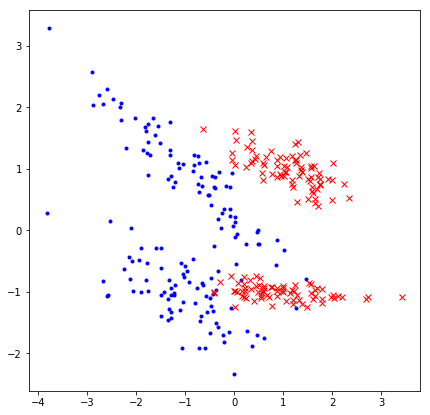

In [2]:
fig = plt.figure(figsize=(7,7))
zero_idx = np.where(y == 0)
one_idx = np.where(y == 1)
plt.plot(x[zero_idx,0], x[zero_idx,1], 'b.')
plt.plot(x[one_idx,0], x[one_idx,1], 'rx')
plt.show()

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

bnb = BernoulliNB(binarize=0.0)
bnb.fit(x_train, y_train)

y_pred_class = bnb.predict(x_test)

bnb.score(x_test, y_test)

0.95

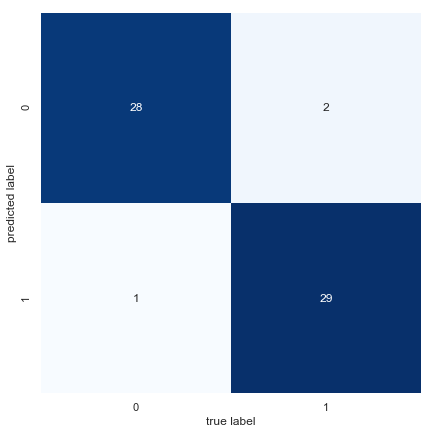

In [4]:
# Plot the confusion matrix
fig = plt.figure(figsize=(7,7))
mat = confusion_matrix(y_test, y_pred_class)
sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['0','1'], yticklabels=['0','1'], cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

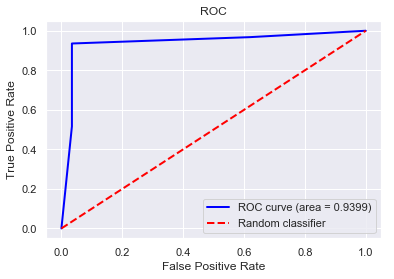

In [8]:
# Getting the probabilities for each class.
y_prob = bnb.predict_proba(x_test)
# Calculating ROC curve and ROC AUC.
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(false_positive_rate, true_positive_rate)
# Plotting ROC curve.
lw = 2
plt.plot(false_positive_rate, true_positive_rate, color='blue', lw=lw, label='ROC curve (area = {:.4f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

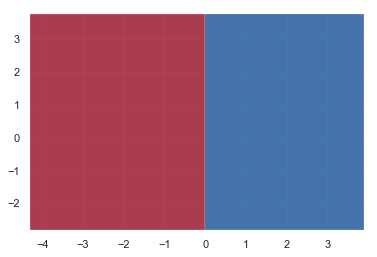

In [9]:
h = .02  # step size in the mesh

cm = plt.cm.RdBu

x_min, x_max = x[:, 0].min() - .5, x[:, 0].max() + .5
y_min, y_max = x[:, 1].min() - .5, x[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
Z = bnb.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

for i in range(0,len(Z)):
    if(Z[i] > 0.5):
        Z[i] = 1.0
    else:
        Z[i] = 0.0

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
plt.show()